In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [2]:
net_df = pd.read_csv("../Datasets/netflix_titles_nov_2019.csv")
net_df.head(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [3]:
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [4]:
type_movie_df = net_df.type.value_counts()
type_movie_df

Movie      3939
TV Show    1898
Name: type, dtype: int64

[Text(0.5, 0, 'Types'), Text(0, 0.5, 'Count')]

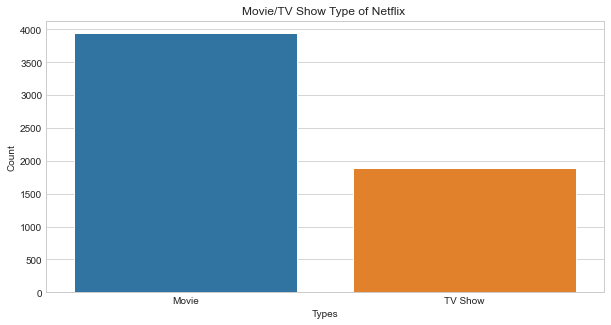

In [5]:
plt.figure(figsize=(10,5))
plt.title("Movie/TV Show Type of Netflix ")
type_movie_df_plot = sns.barplot(x= type_movie_df.index, y= type_movie_df)
type_movie_df_plot.set(xlabel="Types", ylabel="Count")

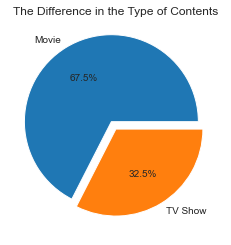

In [6]:
plt.pie(x=type_movie_df, labels=type_movie_df.index, explode=[.1,0], autopct="%.1f%%")
plt.title('The Difference in the Type of Contents')
plt.show()

In [7]:
rating_df = net_df.rating.value_counts(normalize=True)
rating_df

TV-MA       0.332418
TV-14       0.273383
TV-PG       0.116355
R           0.075339
PG-13       0.038957
NR          0.037412
PG          0.027458
TV-Y7       0.026772
TV-G        0.025227
TV-Y        0.023854
TV-Y7-FV    0.015789
G           0.005492
UR          0.001201
NC-17       0.000343
Name: rating, dtype: float64

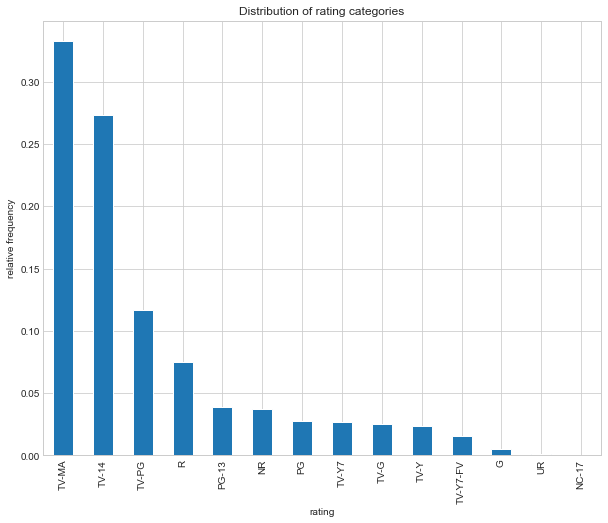

In [8]:
plt.figure(figsize=(10,8))
plt.title("Distribution of rating categories")
plt.xlabel('rating')
plt.ylabel('relative frequency')
rating_df.plot.bar()
plt.show()

<AxesSubplot:title={'center':'Comparing frequency between type and rating'}, xlabel='rating', ylabel='count'>

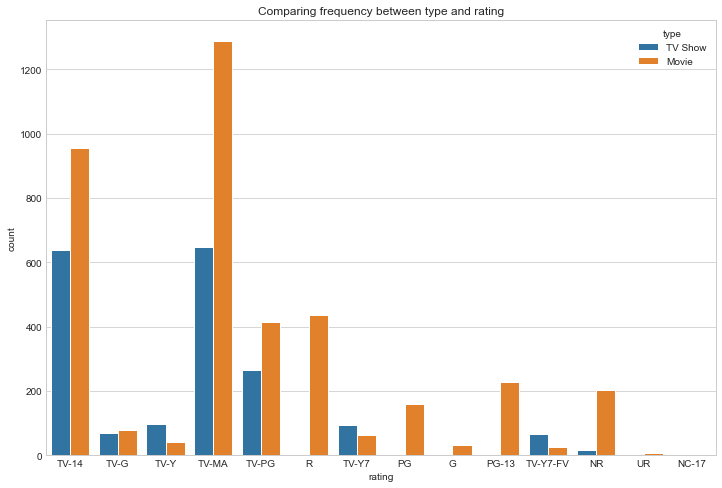

In [9]:
plt.figure(figsize=(12,8))
plt.title("Comparing frequency between type and rating")
sns.countplot(data=net_df, x="rating", hue="type")

In [10]:
dups=net_df.duplicated(['title'])
net_df[dups]['title']

212                                      Drive
511                                     Tunnel
1134                                 Kakegurui
1244                                 Supergirl
1287                                 Limitless
1707                                    Shadow
1741                                    Sarkar
2362                               Oh My Ghost
2412                                  Love O2O
2767                                    Bleach
2803                                   One Day
2873                             The Innocents
2934                          The Birth Reborn
3050                               Oh My Ghost
3214                               Us and Them
3435                                      Troy
3485                                 Locked Up
3585                                      Love
3587                              The Outsider
3593                                     Benji
3660                                      Solo
3671         

In [11]:
net_df["date_added"] = pd.to_datetime(net_df["date_added"])

In [12]:
date_added_by_year = net_df["date_added"].dt.year.value_counts()
date_added_by_year

2019.0    1843
2018.0    1629
2017.0    1184
2016.0     412
2015.0      74
2014.0      19
2011.0      13
2013.0       9
2012.0       7
2009.0       2
2008.0       2
2010.0       1
Name: date_added, dtype: int64

<AxesSubplot:title={'center':'Movie/TV Show Distribution per year'}, xlabel='date_added', ylabel='count'>

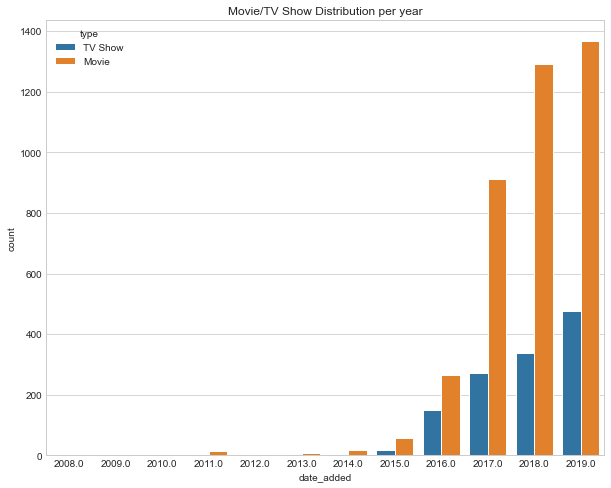

In [13]:
plt.figure(figsize=(10,8))
plt.title("Movie/TV Show Distribution per year")
sns.countplot(x=net_df["date_added"].dt.year, hue="type", data=net_df)

In [14]:
import missingno as msno
from IPython.display import Markdown

In [15]:
display(Markdown("### **Memory usage of each column (in megabytes)**"))
display(net_df.memory_usage(deep=True) / 1024**2)

### **Memory usage of each column (in megabytes)**

Index           0.000122
show_id         0.044533
title           0.423792
director        0.336297
cast            0.918375
country         0.370762
date_added      0.044533
release_year    0.044533
rating          0.341935
duration        0.356618
listed_in       0.503488
description     1.210773
type            0.348749
dtype: float64

In [16]:
display(Markdown("### **Number of unique values**"))
display(net_df.nunique())

### **Number of unique values**

show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64

### **Missing Values**

<AxesSubplot:>

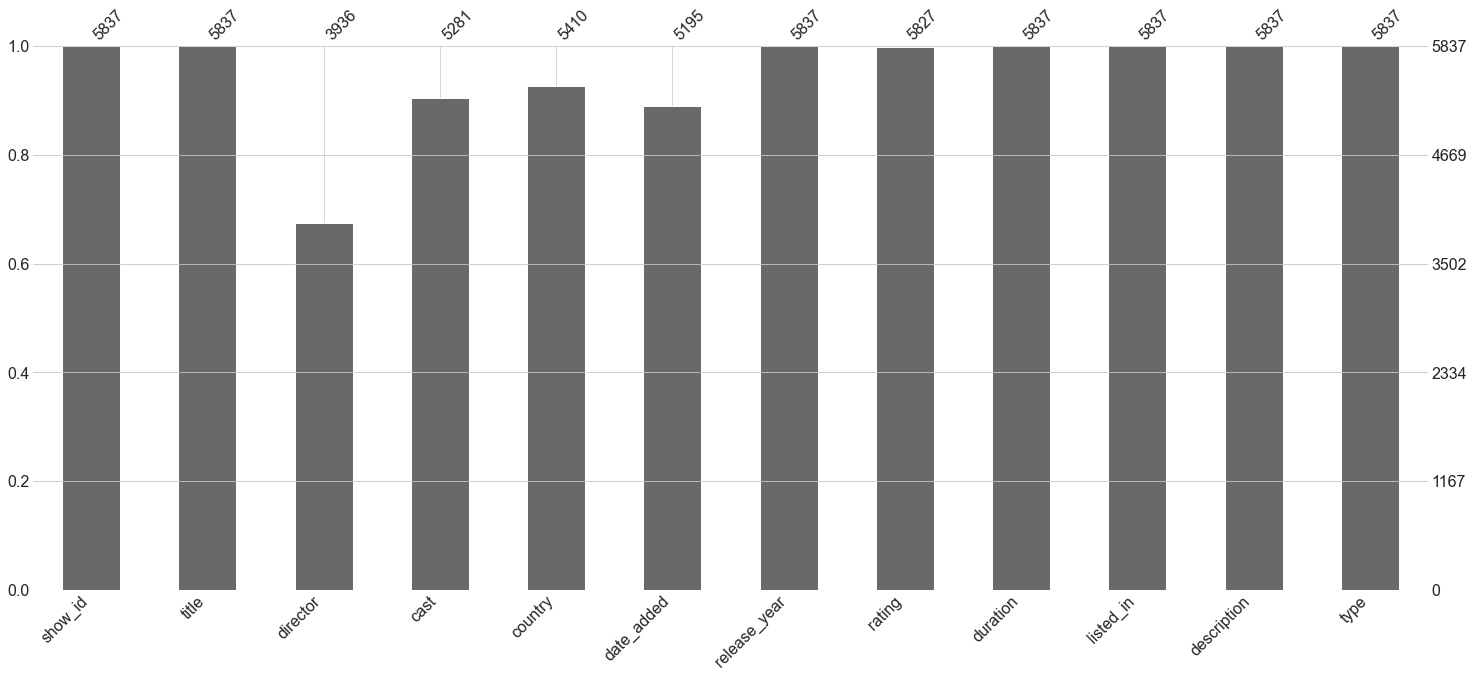

In [17]:
display(Markdown("### **Missing Values**"))
display(msno.bar(net_df))

In [18]:
top_5_distribution_area = net_df["country"].str.split(", ").explode().value_counts().head(5)

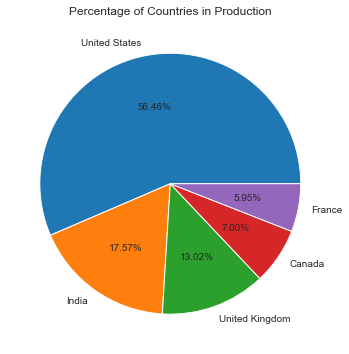

In [19]:
plt.figure(figsize=(8,6))
plt.pie(x=top_5_distribution_area, labels=top_5_distribution_area.index, autopct="%.2f%%")
plt.title('Percentage of Countries in Production')
plt.show()

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Country')]

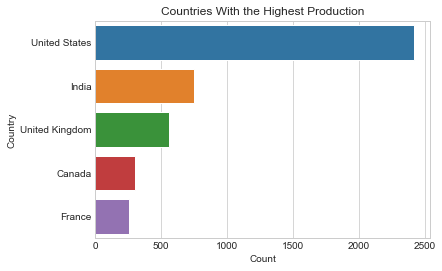

In [20]:
plt.title('Countries With the Highest Production')
top_5_distribution_area_plot = sns.barplot(x=top_5_distribution_area, y=top_5_distribution_area.index)
top_5_distribution_area_plot.set(xlabel="Count",ylabel="Country")

In [21]:
most_produced_netflix_genre = net_df["listed_in"].str.split(", ").explode().value_counts().head(20)
most_produced_netflix_genre

International Movies        1797
Dramas                      1488
Comedies                     992
International TV Shows       966
Documentaries                658
TV Dramas                    574
Action & Adventure           532
Independent Movies           516
TV Comedies                  425
Crime TV Shows               355
Thrillers                    353
Children & Family Movies     340
Romantic Movies              338
Kids' TV                     313
Stand-Up Comedy              273
Docuseries                   271
Romantic TV Shows            265
Music & Musicals             229
Horror Movies                229
British TV Shows             205
Name: listed_in, dtype: int64

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Genres')]

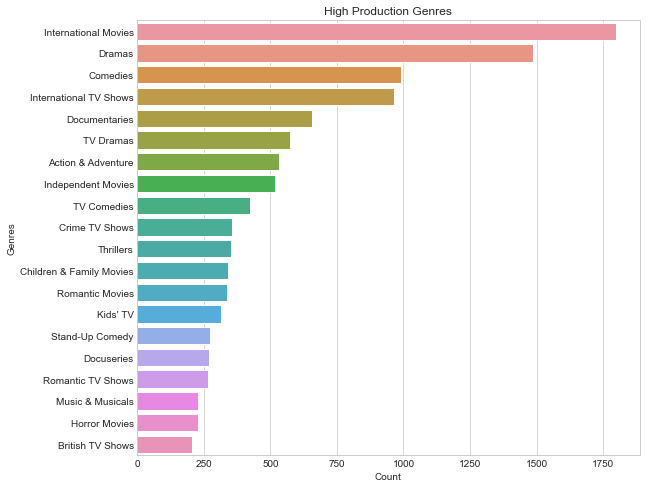

In [22]:
plt.figure(figsize=(9,8))
plt.title('High Production Genres')
most_produced_netflix_genre_plot = sns.barplot(x=most_produced_netflix_genre, y=most_produced_netflix_genre.index)
most_produced_netflix_genre_plot.set(xlabel="Count", ylabel="Genres")